In [1]:
import sys, os
sys.path.append(os.path.abspath(os.path.join('..')))

In [2]:
from scripts.dataloader import DataLoader
from scripts.data_understanding import DataUnderstanding
from scripts.visualization import Visualization
from scripts.utils import Utils

In [3]:
dl = DataLoader('../data', 'data.csv')
raw_df = dl.read_csv()

In [4]:
raw_df.columns

Index(['Bearer Id', 'Start', 'Start ms', 'End', 'End ms', 'Dur. (ms)', 'IMSI',
       'MSISDN/Number', 'IMEI', 'Last Location Name', 'Avg RTT DL (ms)',
       'Avg RTT UL (ms)', 'Avg Bearer TP DL (kbps)', 'Avg Bearer TP UL (kbps)',
       'TCP DL Retrans. Vol (Bytes)', 'TCP UL Retrans. Vol (Bytes)',
       'DL TP < 50 Kbps (%)', '50 Kbps < DL TP < 250 Kbps (%)',
       '250 Kbps < DL TP < 1 Mbps (%)', 'DL TP > 1 Mbps (%)',
       'UL TP < 10 Kbps (%)', '10 Kbps < UL TP < 50 Kbps (%)',
       '50 Kbps < UL TP < 300 Kbps (%)', 'UL TP > 300 Kbps (%)',
       'HTTP DL (Bytes)', 'HTTP UL (Bytes)', 'Activity Duration DL (ms)',
       'Activity Duration UL (ms)', 'Dur. (ms).1', 'Handset Manufacturer',
       'Handset Type', 'Nb of sec with 125000B < Vol DL',
       'Nb of sec with 1250B < Vol UL < 6250B',
       'Nb of sec with 31250B < Vol DL < 125000B',
       'Nb of sec with 37500B < Vol UL',
       'Nb of sec with 6250B < Vol DL < 31250B',
       'Nb of sec with 6250B < Vol UL < 37500B',


### In the user experiance anlysis we will focus on the columns related to TCP, Round Trip time, and Throughput.
First, let's see the missing values and outliers

In [5]:
cols = ['MSISDN/Number', 'Avg RTT DL (ms)', 'Avg RTT UL (ms)', 'Avg Bearer TP DL (kbps)', 'Avg Bearer TP UL (kbps)','TCP DL Retrans. Vol (Bytes)',
       'TCP UL Retrans. Vol (Bytes)', 'Handset Type']
util = Utils()
percent, missing_count = util.percent_missing(raw_df[cols])

In [6]:
missing_count

MSISDN/Number                   1066
Avg RTT DL (ms)                27829
Avg RTT UL (ms)                27812
Avg Bearer TP DL (kbps)            1
Avg Bearer TP UL (kbps)            1
TCP DL Retrans. Vol (Bytes)    88146
TCP UL Retrans. Vol (Bytes)    96649
Handset Type                     572
dtype: int64

### Outliers visualization

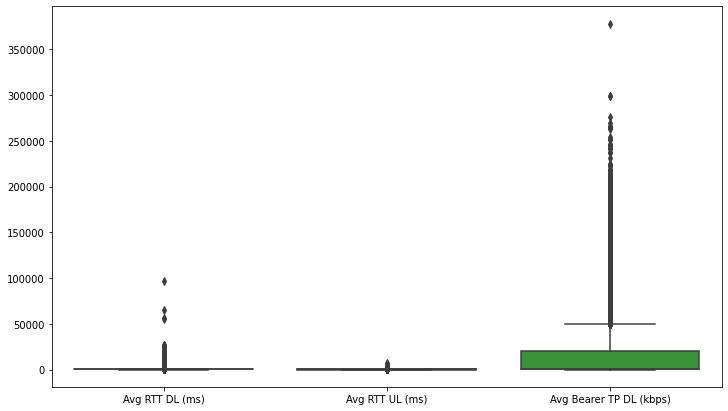

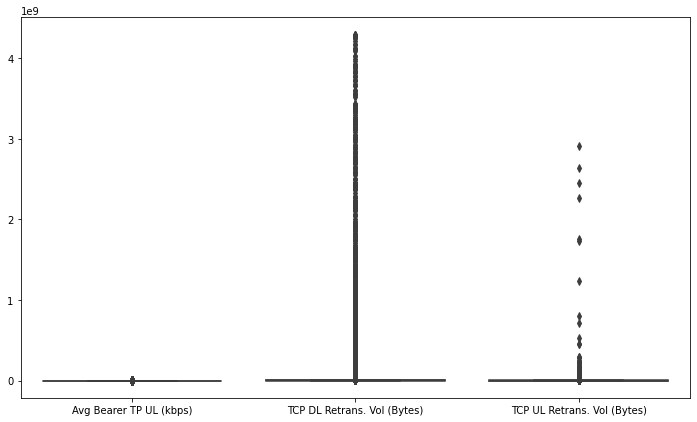

In [7]:
plot = Visualization(raw_df[cols[1:4]])
plot.draw_box_plots()
plot = Visualization(raw_df[cols[4:7]])
plot.draw_box_plots()

### I use winsorization technique to handle outliers
Winsorization is the process of replacing the extreme values of statistical data in order to limit the effect of the outliers on the calculations or the results obtained by using that data.

In [8]:
for column in cols:
    if(column!='MSISDN/Number' and column != 'Handset Type'):
        Q1=raw_df[column].quantile(0.25)
        Q3=raw_df[column].quantile(0.75)
        IQR=Q3-Q1
        Lower_Whisker = Q1-1.5*IQR
        Upper_Whisker = Q3+1.5*IQR
        raw_df.loc[raw_df[column] > Upper_Whisker, column] = raw_df[column].mean()

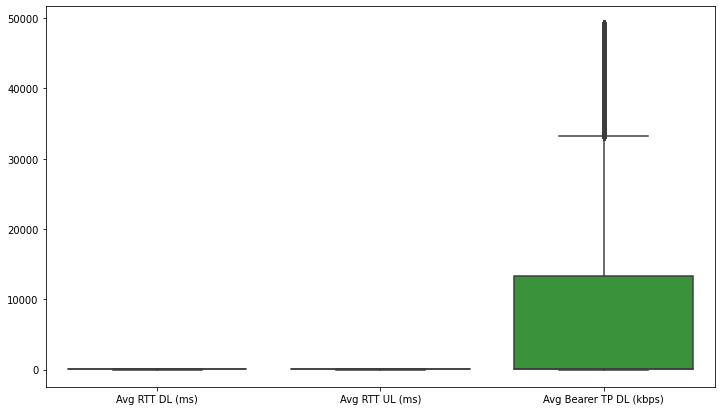

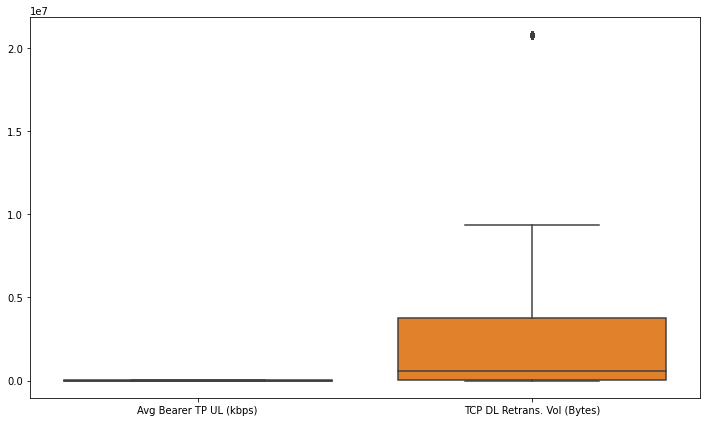

In [9]:
plot = Visualization(raw_df[cols[1:4]])
plot.draw_box_plots()
plot = Visualization(raw_df[cols[4:6]])
plot.draw_box_plots()

In [10]:
for i in cols:
    _, count = util.percent_missing(raw_df[i])
    if count > 0:
        if raw_df[i].dtype == 'object':
            raw_df[i] = raw_df[i].fillna(raw_df[i].mode()[0])
        elif raw_df[i].dtype == 'float64' and raw_df[i].skew(axis=0) != 0:
            raw_df[i] = raw_df[i].fillna(raw_df[i].mode()[0])
        elif raw_df[i].dtype == 'float64' and raw_df[i].skew(axis=0) == 0:
            raw_df[i] = raw_df[i].fillna(raw_df[i].mean())

In [11]:
percent, missing_count = util.percent_missing(raw_df[cols])
missing_count

MSISDN/Number                  0
Avg RTT DL (ms)                0
Avg RTT UL (ms)                0
Avg Bearer TP DL (kbps)        0
Avg Bearer TP UL (kbps)        0
TCP DL Retrans. Vol (Bytes)    0
TCP UL Retrans. Vol (Bytes)    0
Handset Type                   0
dtype: int64

In [12]:
raw_df['Total_TCP'] = raw_df['TCP DL Retrans. Vol (Bytes)'] + raw_df['TCP UL Retrans. Vol (Bytes)']
raw_df['Total_RTT'] = raw_df['Avg RTT DL (ms)'] + raw_df['Avg RTT UL (ms)']
raw_df['Total_TP'] = raw_df['Avg Bearer TP DL (kbps)'] + raw_df['Avg Bearer TP UL (kbps)'] 

## Compute & list 10 of the top, bottom and most frequent:
        a. TCP values in the dataset. 
        b. RTT values in the dataset.
        c. Throughput values in the dataset.

In [13]:
tcp = raw_df.sort_values(by=['Total_TCP'], ascending=False)
print("Top 10 TCP")
tcp[cols].head(10)


Top 10 TCP


,MSISDN/Number,Avg RTT DL (ms),Avg RTT UL (ms),Avg Bearer TP DL (kbps),Avg Bearer TP UL (kbps),TCP DL Retrans. Vol (Bytes),TCP UL Retrans. Vol (Bytes),Handset Type
0,3.366496e+10,42.000000,5.0,23.0,44.0,2.080991e+07,759658.664811,Samsung Galaxy A5 Sm-A520F
87960,3.366417e+10,33.000000,19.0,1246.0,59.0,2.080991e+07,759658.664811,Apple iPhone 6 (A1586)
87979,3.366012e+10,109.795706,5.0,0.0,0.0,2.080991e+07,759658.664811,Sony Mobile Comm. Xperia L1
87978,3.361702e+10,34.000000,5.0,23.0,55.0,2.080991e+07,759658.664811,Apple iPhone 6S (A1688)
87975,3.361785e+10,27.000000,2.0,58.0,55.0,2.080991e+07,759658.664811,Apple iPhone 6S Plus (A1687)
87969,3.362318e+10,109.795706,5.0,36.0,33.0,2.080991e+07,759658.664811,Samsung Galaxy A8 (2018)
87967,3.365036e+10,43.000000,5.0,45.0,50.0,2.080991e+07,759658.664811,Apple iPhone 6 Plus (A1524)
87966,3.368319e+10,109.795706,5.0,35.0,40.0,2.080991e+07,759658.664811,undefined
87965,3.361510e+10,49.000000,8.0,435.0,280.0,2.080991e+07,759658.664811,Lenovo Moto G (5Th Gen) Indr003546
87964,3.378276e+10,24.000000,1.0,63.0,52.0,2.080991e+07,759658.664811,Apple iPhone 8 Plus (A1897)


In [14]:
print("Tail 10 TCP")
tcp[cols].tail(10)

Tail 10 TCP


,MSISDN/Number,Avg RTT DL (ms),Avg RTT UL (ms),Avg Bearer TP DL (kbps),Avg Bearer TP UL (kbps),TCP DL Retrans. Vol (Bytes),TCP UL Retrans. Vol (Bytes),Handset Type
12849,3.360783e+10,29.000000,3.000000,16242.0,611.0,62.0,81.0,Apple iPhone 5C (A1529)
83214,3.376826e+10,49.000000,10.000000,2158.0,2645.0,92.0,42.0,undefined
95955,3.362636e+10,34.000000,6.000000,10128.0,836.0,92.0,42.0,Apple iPhone 7 (A1778)
99947,3.376206e+10,39.000000,2.000000,31540.0,1037.0,38.0,91.0,Apple iPhone 8 (A1905)
8794,3.361478e+10,39.000000,25.000000,8498.0,156.0,86.0,42.0,Huawei Ascend Mate7
97061,3.364108e+10,77.000000,4.000000,174.0,77.0,38.0,75.0,Apple iPhone 6 (A1549)
13142,3.365940e+10,53.000000,3.000000,4931.0,124.0,38.0,70.0,Apple iPhone 6 (A1586)
18417,3.368178e+10,51.000000,2.000000,47118.0,648.0,68.0,38.0,Huawei P9 Lite
111100,3.365013e+10,46.000000,2.000000,30230.0,351.0,51.0,46.0,Apple iPhone 5S (A1457)
143594,3.365879e+10,109.795706,17.662883,387.0,24.0,8.0,78.0,Huawei E5180


In [15]:
rtt = raw_df.sort_values(by=['Total_RTT'], ascending=False)
print("Top 10 RTT")
rtt.head(10)

Top 10 RTT


,Bearer Id,Start,Start ms,End,End ms,Dur. (ms),IMSI,MSISDN/Number,IMEI,Last Location Name,...,Netflix UL (Bytes),Gaming DL (Bytes),Gaming UL (Bytes),Other DL (Bytes),Other UL (Bytes),Total UL (Bytes),Total DL (Bytes),Total_TCP,Total_RTT,Total_TP
141718,1.304243e+19,4/29/2019 4:11,170.0,4/30/2019 4:11,180.0,86400.0,2.082014e+14,3.366475e+10,8.637690e+13,T83971C,...,17572979.0,333422806.0,5416046.0,135146587.0,882525.0,42847352.0,348283374.0,2.221179e+06,160.0,18679.428647
51987,1.304243e+19,4/25/2019 0:35,195.0,4/27/2019 16:17,274.0,229328.0,2.082014e+14,3.366471e+10,8.654080e+13,T71746A,...,2167144.0,683638356.0,8597141.0,428679300.0,785654.0,27767245.0,707635427.0,7.640128e+06,159.0,14060.000000
40596,1.304243e+19,4/25/2019 4:09,184.0,4/26/2019 4:09,151.0,86399.0,2.082018e+14,3.376373e+10,8.637690e+13,T85731A,...,1337503.0,675760733.0,8460214.0,144389575.0,8327446.0,36070242.0,708737423.0,1.763066e+06,159.0,30473.428647
41065,1.304243e+19,4/25/2019 4:24,592.0,4/26/2019 4:24,587.0,86399.0,2.082014e+14,3.365981e+10,8.654080e+13,T21545B,...,7638198.0,57425621.0,13901943.0,532992377.0,11292427.0,43651955.0,101289750.0,3.178325e+06,159.0,49541.000000
35740,7.277826e+18,4/25/2019 1:17,984.0,4/26/2019 1:17,979.0,86399.0,2.082019e+14,3.365987e+10,8.637690e+13,T92798A,...,15144263.0,73220458.0,15486572.0,832648916.0,11514500.0,48672035.0,121385081.0,3.597421e+06,159.0,24412.428647
61439,1.318654e+19,4/26/2019 4:39,962.0,4/27/2019 4:39,859.0,86399.0,2.082017e+14,3.365010e+10,8.619200e+13,L70869C,...,11806585.0,352030601.0,4940120.0,412874600.0,9887107.0,36479987.0,404053230.0,1.295560e+05,159.0,25560.428647
35267,1.304243e+19,4/25/2019 0:50,821.0,4/26/2019 0:50,796.0,86399.0,2.082022e+14,3.365984e+10,8.654080e+13,D72976B,...,17588579.0,151712528.0,1857927.0,591703243.0,4659273.0,43092463.0,169570896.0,2.156957e+07,158.0,17217.428647
40136,1.304243e+19,4/25/2019 3:52,429.0,4/26/2019 3:52,88.0,86400.0,2.082018e+14,3.376041e+10,8.637690e+13,D79085A,...,8823067.0,843129935.0,7305720.0,247462673.0,13559065.0,47750512.0,855489433.0,3.252637e+06,158.0,24802.000000
38343,7.277826e+18,4/25/2019 2:49,884.0,4/26/2019 2:49,895.0,86400.0,2.082018e+14,3.366529e+10,8.637690e+13,D77147A,...,1642989.0,377745131.0,5080525.0,144460360.0,13398430.0,33005625.0,404302682.0,3.460689e+06,158.0,41124.428647
85517,7.277826e+18,4/27/2019 11:34,565.0,4/28/2019 0:26,788.0,46288.0,2.082014e+14,3.366287e+10,8.637690e+13,T89771A,...,21281831.0,172856156.0,9792492.0,48629949.0,5874018.0,48517052.0,188788801.0,4.522857e+06,158.0,13282.000000


In [16]:
print("Bottom 10 RTT")
rtt.tail(10)

Bottom 10 RTT


,Bearer Id,Start,Start ms,End,End ms,Dur. (ms),IMSI,MSISDN/Number,IMEI,Last Location Name,...,Netflix UL (Bytes),Gaming DL (Bytes),Gaming UL (Bytes),Other DL (Bytes),Other UL (Bytes),Total UL (Bytes),Total DL (Bytes),Total_TCP,Total_RTT,Total_TP
8756,7.349883e+18,4/24/2019 15:38,309.0,4/25/2019 2:30,483.0,39151.0,2.082014e+14,3.376228e+10,8.617540e+13,L50543A,...,2576121.0,645633612.0,12310207.0,428095187.0,3866246.0,30271868.0,685288192.0,2.156957e+07,6.0,97.0
123210,7.349883e+18,4/28/2019 5:23,546.0,4/29/2019 7:57,388.0,95614.0,2.082017e+14,3.366862e+10,3.554191e+13,9.16456698533324E+015,...,1351248.0,357167634.0,9368232.0,40392292.0,3032640.0,21265949.0,379986724.0,2.156957e+07,6.0,101.0
103544,7.349883e+18,4/27/2019 6:07,553.0,4/29/2019 10:32,598.0,188675.0,2.082010e+14,3.365949e+10,3.566501e+13,D12302A,...,12776099.0,643253277.0,4310514.0,613876485.0,15481200.0,40240469.0,680402061.0,2.156957e+07,5.0,78.0
144923,7.349883e+18,4/29/2019 5:51,568.0,4/30/2019 16:21,575.0,124176.0,2.082010e+14,3.361171e+10,8.662190e+13,T96156B,...,4617803.0,194670647.0,13230528.0,600005656.0,10124776.0,46889572.0,212446393.0,2.156957e+07,4.0,96.0
50966,7.349883e+18,4/24/2019 6:45,836.0,4/27/2019 10:13,398.0,271683.0,2.082014e+14,3.369505e+10,8.611970e+13,L15023A,...,17734004.0,776354891.0,5850937.0,594493834.0,4501072.0,36541824.0,807067303.0,2.156957e+07,4.0,121.0
71738,7.349883e+18,4/26/2019 8:32,773.0,4/27/2019 7:18,668.0,81953.0,2.082017e+14,3.366020e+10,3.594081e+13,D13946A,...,4707433.0,470070761.0,9617291.0,465954990.0,13195530.0,31919342.0,497281969.0,2.156957e+07,2.0,113.0
103321,7.349883e+18,4/27/2019 4:43,48.0,4/29/2019 7:26,912.0,182605.0,2.082014e+14,3.360926e+10,3.570111e+13,L19431A,...,9836432.0,807917094.0,3593363.0,329288808.0,10488188.0,36518757.0,837353608.0,2.156957e+07,0.0,99.0
42602,7.349883e+18,4/25/2019 5:22,809.0,4/26/2019 18:44,15.0,134487.0,2.082017e+14,3.365298e+10,8.672620e+13,L17514C,...,15733624.0,463789888.0,16431257.0,632251108.0,7678741.0,52938955.0,494146872.0,2.156957e+07,0.0,100.0
124538,7.349883e+18,4/28/2019 6:08,856.0,4/29/2019 4:59,429.0,82286.0,2.082003e+14,3.366158e+10,8.652440e+13,L14053B,...,3235562.0,723841277.0,7829303.0,100849624.0,5347376.0,38630019.0,749208625.0,2.156957e+07,0.0,85.0
143878,7.349883e+18,4/29/2019 5:09,463.0,4/30/2019 21:03,633.0,143608.0,2.082014e+14,3.364275e+10,3.569521e+13,D12775B,...,11419816.0,234511088.0,4924189.0,486131355.0,976847.0,33007732.0,260613139.0,2.156957e+07,0.0,100.0


In [17]:
TP = raw_df.sort_values(by=['Total_TP'], ascending=False)
print("Top 10 TP")
TP.head(10)

Top 10 TP


,Bearer Id,Start,Start ms,End,End ms,Dur. (ms),IMSI,MSISDN/Number,IMEI,Last Location Name,...,Netflix UL (Bytes),Gaming DL (Bytes),Gaming UL (Bytes),Other DL (Bytes),Other UL (Bytes),Total UL (Bytes),Total DL (Bytes),Total_TCP,Total_RTT,Total_TP
76861,7.277826e+18,4/27/2019 1:24,799.0,4/28/2019 1:24,757.0,86399.0,2.082017e+14,3.376010e+10,8.637690e+13,D92859B,...,7663335.0,465437382.0,9238331.0,802439081.0,8027415.0,40636972.0,492926850.0,5.334710e+06,95.000000,51844.0
36716,1.304243e+19,4/25/2019 1:55,103.0,4/26/2019 1:55,1.0,86399.0,2.082018e+14,3.366343e+10,8.637690e+13,D74315A,...,10857896.0,228206745.0,11575615.0,256483574.0,3676254.0,28213992.0,256740910.0,4.924946e+06,101.662883,51790.0
142003,1.304243e+19,4/29/2019 4:19,106.0,4/30/2019 4:19,58.0,86399.0,2.082017e+14,3.365004e+10,8.637690e+13,D89114A,...,4377993.0,727765376.0,12244986.0,684220180.0,7508012.0,40922949.0,780137416.0,8.447700e+05,128.000000,51730.0
4428,7.277826e+18,4/24/2019 8:01,271.0,4/25/2019 0:11,631.0,58209.0,2.082003e+14,3.365840e+10,3.561271e+13,D14004C,...,6498411.0,369732097.0,5163099.0,630373528.0,616767.0,26343468.0,392681892.0,1.450213e+06,115.795706,51695.0
38893,1.304243e+19,4/25/2019 3:07,889.0,4/26/2019 3:07,922.0,86400.0,2.082009e+14,3.376091e+10,8.637690e+13,L88699A,...,5534337.0,829450184.0,13408654.0,724908898.0,2362303.0,38759021.0,854941012.0,2.049974e+06,93.000000,51675.0
37652,7.277826e+18,4/25/2019 2:27,666.0,4/26/2019 2:27,440.0,86395.0,2.082017e+14,3.366704e+10,8.637690e+13,L89174A,...,6343370.0,662410423.0,89817.0,153469649.0,13827484.0,43076867.0,694490815.0,2.083809e+07,84.000000,51588.0
127150,1.304243e+19,4/27/2019 16:29,385.0,4/30/2019 18:16,266.0,265595.0,2.082015e+14,3.368274e+10,8.666360e+13,D74551A,...,1695991.0,411102685.0,4526291.0,816511298.0,10067863.0,23261850.0,449169270.0,1.074100e+04,58.000000,51533.0
67190,7.277826e+18,4/26/2019 7:43,440.0,4/27/2019 10:27,363.0,96253.0,2.082018e+14,3.368394e+10,3.566261e+13,9.16456698576179E+015,...,2505550.0,787285543.0,11991643.0,172207268.0,15754673.0,47716359.0,818247646.0,3.786000e+03,37.662883,51513.0
35901,1.304243e+19,4/25/2019 1:23,196.0,4/26/2019 1:23,95.0,86399.0,2.082018e+14,3.376378e+10,8.637690e+13,D73383A,...,467189.0,294944096.0,8673476.0,50129295.0,11783737.0,35202740.0,316483620.0,2.934574e+06,91.000000,51473.0
6053,1.304243e+19,4/24/2019 11:18,962.0,4/25/2019 0:10,114.0,46353.0,2.082017e+14,3.376224e+10,3.565551e+13,D78149A,...,18713762.0,486498612.0,6311689.0,702614817.0,14419406.0,60582314.0,505561460.0,2.109296e+06,81.000000,51440.0


In [18]:
print("Bottom 10 TP")
TP.tail(10)

Bottom 10 TP


,Bearer Id,Start,Start ms,End,End ms,Dur. (ms),IMSI,MSISDN/Number,IMEI,Last Location Name,...,Netflix UL (Bytes),Gaming DL (Bytes),Gaming UL (Bytes),Other DL (Bytes),Other UL (Bytes),Total UL (Bytes),Total DL (Bytes),Total_TCP,Total_RTT,Total_TP
16353,1.311448e+19,4/24/2019 19:10,736.0,4/25/2019 0:39,851.0,19697.0,2.082014e+14,3.366171e+10,3.538021e+13,D47225A,...,1437773.0,703405251.0,1566539.0,689572835.0,6233573.0,34970904.0,739410309.0,2.156957e+07,114.795706,0.0
134893,1.311448e+19,4/28/2019 22:09,411.0,4/30/2019 15:16,456.0,148029.0,2.082019e+14,3.361064e+10,8.624540e+13,T92613C,...,20424213.0,328050054.0,13997088.0,584054772.0,16523559.0,58857390.0,358869307.0,2.156957e+07,114.795706,0.0
20098,1.304243e+19,4/24/2019 20:04,815.0,4/25/2019 0:03,94.0,14334.0,2.082017e+14,3.363533e+10,3.526911e+13,D11002B,...,18206599.0,497397997.0,15610097.0,81364476.0,1757280.0,41412823.0,544018999.0,2.156957e+07,114.795706,0.0
87748,7.277826e+18,4/27/2019 12:57,639.0,4/28/2019 0:41,277.0,42216.0,2.082010e+14,3.366072e+10,3.554091e+13,D14148C,...,2452599.0,285734544.0,9803947.0,787784855.0,15822370.0,42304961.0,291817158.0,2.156957e+07,114.795706,0.0
69002,1.304243e+19,4/26/2019 8:00,296.0,4/27/2019 7:22,981.0,84133.0,2.082015e+14,3.366216e+10,8.637690e+13,D76732C,...,15745023.0,803697768.0,12688396.0,121924393.0,11285124.0,52821956.0,835459322.0,2.156957e+07,114.795706,0.0
32753,7.349883e+18,4/24/2019 19:34,931.0,4/26/2019 17:00,674.0,163555.0,2.082017e+14,3.377746e+10,3.578101e+13,T77255A,...,15368222.0,104462799.0,10732606.0,373009541.0,5317208.0,39580358.0,153381991.0,2.156957e+07,114.795706,0.0
96185,1.304243e+19,4/27/2019 16:34,486.0,4/28/2019 1:56,950.0,33766.0,2.082017e+14,3.366758e+10,3.596201e+13,T72360A,...,3196415.0,657850675.0,10698124.0,472509067.0,7477294.0,39099212.0,686308718.0,2.156957e+07,114.795706,0.0
116118,7.277826e+18,4/28/2019 1:19,862.0,4/29/2019 1:19,629.0,86399.0,2.082010e+14,3.363047e+10,3.573641e+13,T89796C,...,3040150.0,620570238.0,2035284.0,97759623.0,15986942.0,34330833.0,651353733.0,2.156957e+07,114.795706,0.0
148,7.277826e+18,4/22/2019 22:54,795.0,4/25/2019 1:01,647.0,180452.0,2.082003e+14,3.365033e+10,3.573301e+13,T96034B,...,12562006.0,635832204.0,15210423.0,478436011.0,15304212.0,64874677.0,675852676.0,2.156957e+07,114.795706,0.0
17994,1.304243e+19,4/24/2019 19:36,400.0,4/25/2019 1:12,703.0,20160.0,2.082010e+14,3.363679e+10,8.687980e+13,D72386B,...,1767400.0,337943906.0,10167559.0,407900938.0,6480126.0,39641829.0,362457571.0,2.156957e+07,114.795706,0.0


### Compute & report:
        d. The distribution of the average throughput  per handset type and provide interpretation for your
        findings.
        e. The average TCP retransmission view per handset type and provide interpretation for your findings.

In [19]:
dist_tp_handset = raw_df.groupby('Handset Type').agg({'Total_TP': 'sum', 'Total_TCP': 'sum'})
dist_tp_handset.head(10)

,Total_TP,Total_TCP
Handset Type,,
A-Link Telecom I. Cubot A5,23510.000000,2.156957e+07
A-Link Telecom I. Cubot Note Plus,6699.000000,6.162130e+05
A-Link Telecom I. Cubot Note S,8937.000000,2.087717e+07
A-Link Telecom I. Cubot Nova,13850.045927,1.371700e+05
A-Link Telecom I. Cubot Power,13642.045927,8.041000e+03
A-Link Telecom I. Cubot R9,4039.000000,3.099900e+04
A-Link Telecom I. Cubot X18 Plus,25118.000000,3.451810e+06
Acer Liquid M220,34.000000,2.156957e+07
Acer Liquid Z220,552.000000,1.743870e+05


### Kmeans clustering

In [20]:
from scripts.datacleaning import DataCleaning
data_cleaner = DataCleaning()
clean_df = raw_df[cols].iloc[:,:-1]
normalized = data_cleaner.normalizer(clean_df)


In [21]:
normalized

array([[9.99999809e-01, 1.24758767e-09, 1.48522342e-10, ...,
        1.30699661e-09, 6.18147442e-04, 2.25652568e-05],
       [9.99999809e-01, 1.92982212e-09, 1.48447855e-10, ...,
        7.71928847e-10, 6.17837428e-04, 2.25539399e-05],
       [9.99999810e-01, 3.25218145e-09, 1.48101486e-10, ...,
        2.66582675e-10, 6.16395846e-04, 2.25013154e-05],
       ...,
       [9.99999808e-01, 1.27892845e-09, 1.78455132e-10, ...,
        1.39789854e-09, 6.18939334e-04, 2.25941646e-05],
       [9.99999808e-01, 1.10054756e-09, 1.48722643e-10, ...,
        1.10054756e-09, 6.18981089e-04, 2.25956888e-05],
       [9.99999808e-01, 3.26517094e-09, 1.48693016e-10, ...,
        5.26500750e-08, 6.18857783e-04, 2.25911876e-05]])

In [22]:
squared_error = []
kmeans_kwargs= {
    'init':"k-means++",
    'n_init': 10,
    'max_iter': 300,
    'random_state':20  
}

In [23]:
from sklearn.cluster import KMeans
for c in range(1, 11):
    kmeans = KMeans(n_clusters=c, **kmeans_kwargs)
    kmeans.fit(normalized)
    squared_error.append(kmeans.inertia_)

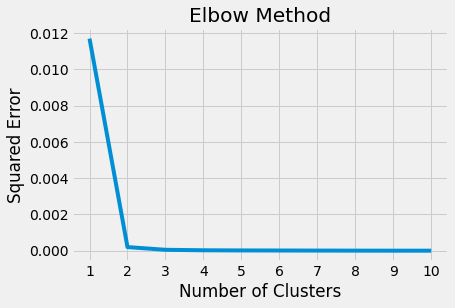

In [24]:
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
plt.plot(range(1,11), squared_error)
plt.xticks(range(1,11))
plt.xlabel("Number of Clusters")
plt.ylabel("Squared Error")
plt.title("Elbow Method")
plt.show()

In [25]:
kmeans = KMeans(init="random",
                n_clusters=2,
                n_init=10,
                max_iter=300,
                random_state=42
   )

In [26]:
model = kmeans.fit(normalized)

In [27]:
raw_df['cluster'] = model.predict(normalized)
raw_df.head(10)

,Bearer Id,Start,Start ms,End,End ms,Dur. (ms),IMSI,MSISDN/Number,IMEI,Last Location Name,...,Gaming DL (Bytes),Gaming UL (Bytes),Other DL (Bytes),Other UL (Bytes),Total UL (Bytes),Total DL (Bytes),Total_TCP,Total_RTT,Total_TP,cluster
0,1.311448e+19,4/4/2019 12:01,770.0,4/25/2019 14:35,662.0,1823652.0,2.082014e+14,3.366496e+10,3.552121e+13,9.16456699548519E+015,...,278082303.0,14344150.0,171744450.0,8814393.0,36749741.0,308879636.0,2.156957e+07,47.000000,67.0,1
1,1.311448e+19,4/9/2019 13:04,235.0,4/25/2019 8:15,606.0,1365104.0,2.082019e+14,3.368185e+10,3.579401e+13,L77566A,...,608750074.0,1170709.0,526904238.0,15055145.0,53800391.0,653384965.0,2.156957e+07,70.000000,42.0,1
2,1.311448e+19,4/9/2019 17:42,1.0,4/25/2019 11:58,652.0,1361762.0,2.082003e+14,3.376063e+10,3.528151e+13,D42335A,...,229584621.0,395630.0,410692588.0,4215763.0,27883638.0,279807335.0,2.156957e+07,114.795706,15.0,1
3,1.311448e+19,4/10/2019 0:31,486.0,4/25/2019 7:36,171.0,1321509.0,2.082014e+14,3.375034e+10,3.535661e+13,T21824A,...,799538153.0,10849722.0,749039933.0,12797283.0,43324218.0,846028530.0,2.156957e+07,114.795706,88.0,1
4,1.311448e+19,4/12/2019 20:10,565.0,4/25/2019 10:40,954.0,1089009.0,2.082014e+14,3.369980e+10,3.540701e+13,D88865A,...,527707248.0,3529801.0,550709500.0,13910322.0,38542814.0,569138589.0,2.156957e+07,114.795706,15.0,1
5,1.311448e+19,4/12/2019 21:37,439.0,4/25/2019 8:08,553.0,1074638.0,2.082014e+14,3.366819e+10,3.529841e+13,T89132C,...,710293538.0,13167974.0,654978277.0,4436057.0,30307754.0,754452212.0,2.156957e+07,114.795706,124.0,1
6,1.311448e+19,4/13/2019 8:41,612.0,4/25/2019 8:16,168.0,1035261.0,2.082014e+14,3.366537e+10,8.676270e+13,9.16456701058919E+015,...,44796223.0,14084934.0,803653557.0,10649768.0,47925246.0,70562047.0,2.156957e+07,107.000000,60.0,1
7,1.304243e+19,4/14/2019 2:11,592.0,4/25/2019 2:26,512.0,951292.0,2.082010e+14,3.376349e+10,8.654640e+13,CELL_208_20_520025_1,...,748906189.0,16149622.0,537601820.0,7714657.0,58813016.0,775350343.0,7.791787e+05,57.000000,4114.0,0
8,1.311448e+19,4/14/2019 12:48,121.0,4/25/2019 10:22,960.0,941634.0,2.082014e+14,3.369874e+10,3.556241e+13,T42084A,...,821671285.0,6548349.0,172920486.0,14749031.0,42363146.0,861612261.0,2.156957e+07,114.795706,95.0,1
9,1.304243e+19,4/15/2019 0:32,0.0,4/25/2019 0:40,284.0,864482.0,2.082003e+14,3.365922e+10,3.557311e+13,L20434C,...,811355188.0,1591237.0,64856042.0,12815208.0,22417975.0,850570347.0,3.238627e+06,104.000000,6380.0,0


### Prepare data for User Satsfaction

In [28]:
import pickle
with open("../models/user_experiance_clustering_model.pkl", "wb") as f:
    pickle.dump(model, f)

In [30]:
distance = model.transform(normalized)

In [31]:
distance_from_less = list(map(lambda x : x[0], distance))

In [33]:
raw_df['experiance_score'] = distance_from_center

In [34]:
cols.append('experiance_score')

In [36]:
util.save_data(raw_df[cols], "../data/user_experiance_data.csv")